In [1]:
import numpy as np
import pandas as pd

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Clustering libraries
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import SilhouetteVisualizer

# Classification Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Classification Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Classification Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc
     

In [2]:
data = pd.read_csv("C:/Users/MrWhi/OneDrive/Desktop/univpm/DataScience/Progetto_Datascience/python/london_weather.csv")

data.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [3]:
data.columns


Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

In [4]:
data.dtypes

date                  int64
cloud_cover         float64
sunshine            float64
global_radiation    float64
max_temp            float64
mean_temp           float64
min_temp            float64
precipitation       float64
pressure            float64
snow_depth          float64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [6]:
# checking if there is any NULL data
data.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [7]:
# Lista delle colonne da riempire con la media
columns_to_fill = [
    "cloud_cover",
    "global_radiation",
    "max_temp",
    "mean_temp",
    "min_temp",
    "precipitation",
    "snow_depth",
    "pressure"
]

# Riempire i valori mancanti con la media
for col in columns_to_fill:
    data[col] = data[col].fillna(data[col].mean())

In [8]:
data.isnull().sum()

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

In [9]:

data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')


In [10]:

print(data.head())

        date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0 1979-01-01          2.0       7.0              52.0       2.3       -4.1   
1 1979-01-02          6.0       1.7              27.0       1.6       -2.6   
2 1979-01-03          5.0       0.0              13.0       1.3       -2.8   
3 1979-01-04          8.0       0.0              13.0      -0.3       -2.6   
4 1979-01-05          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  


2. CLUSTERING


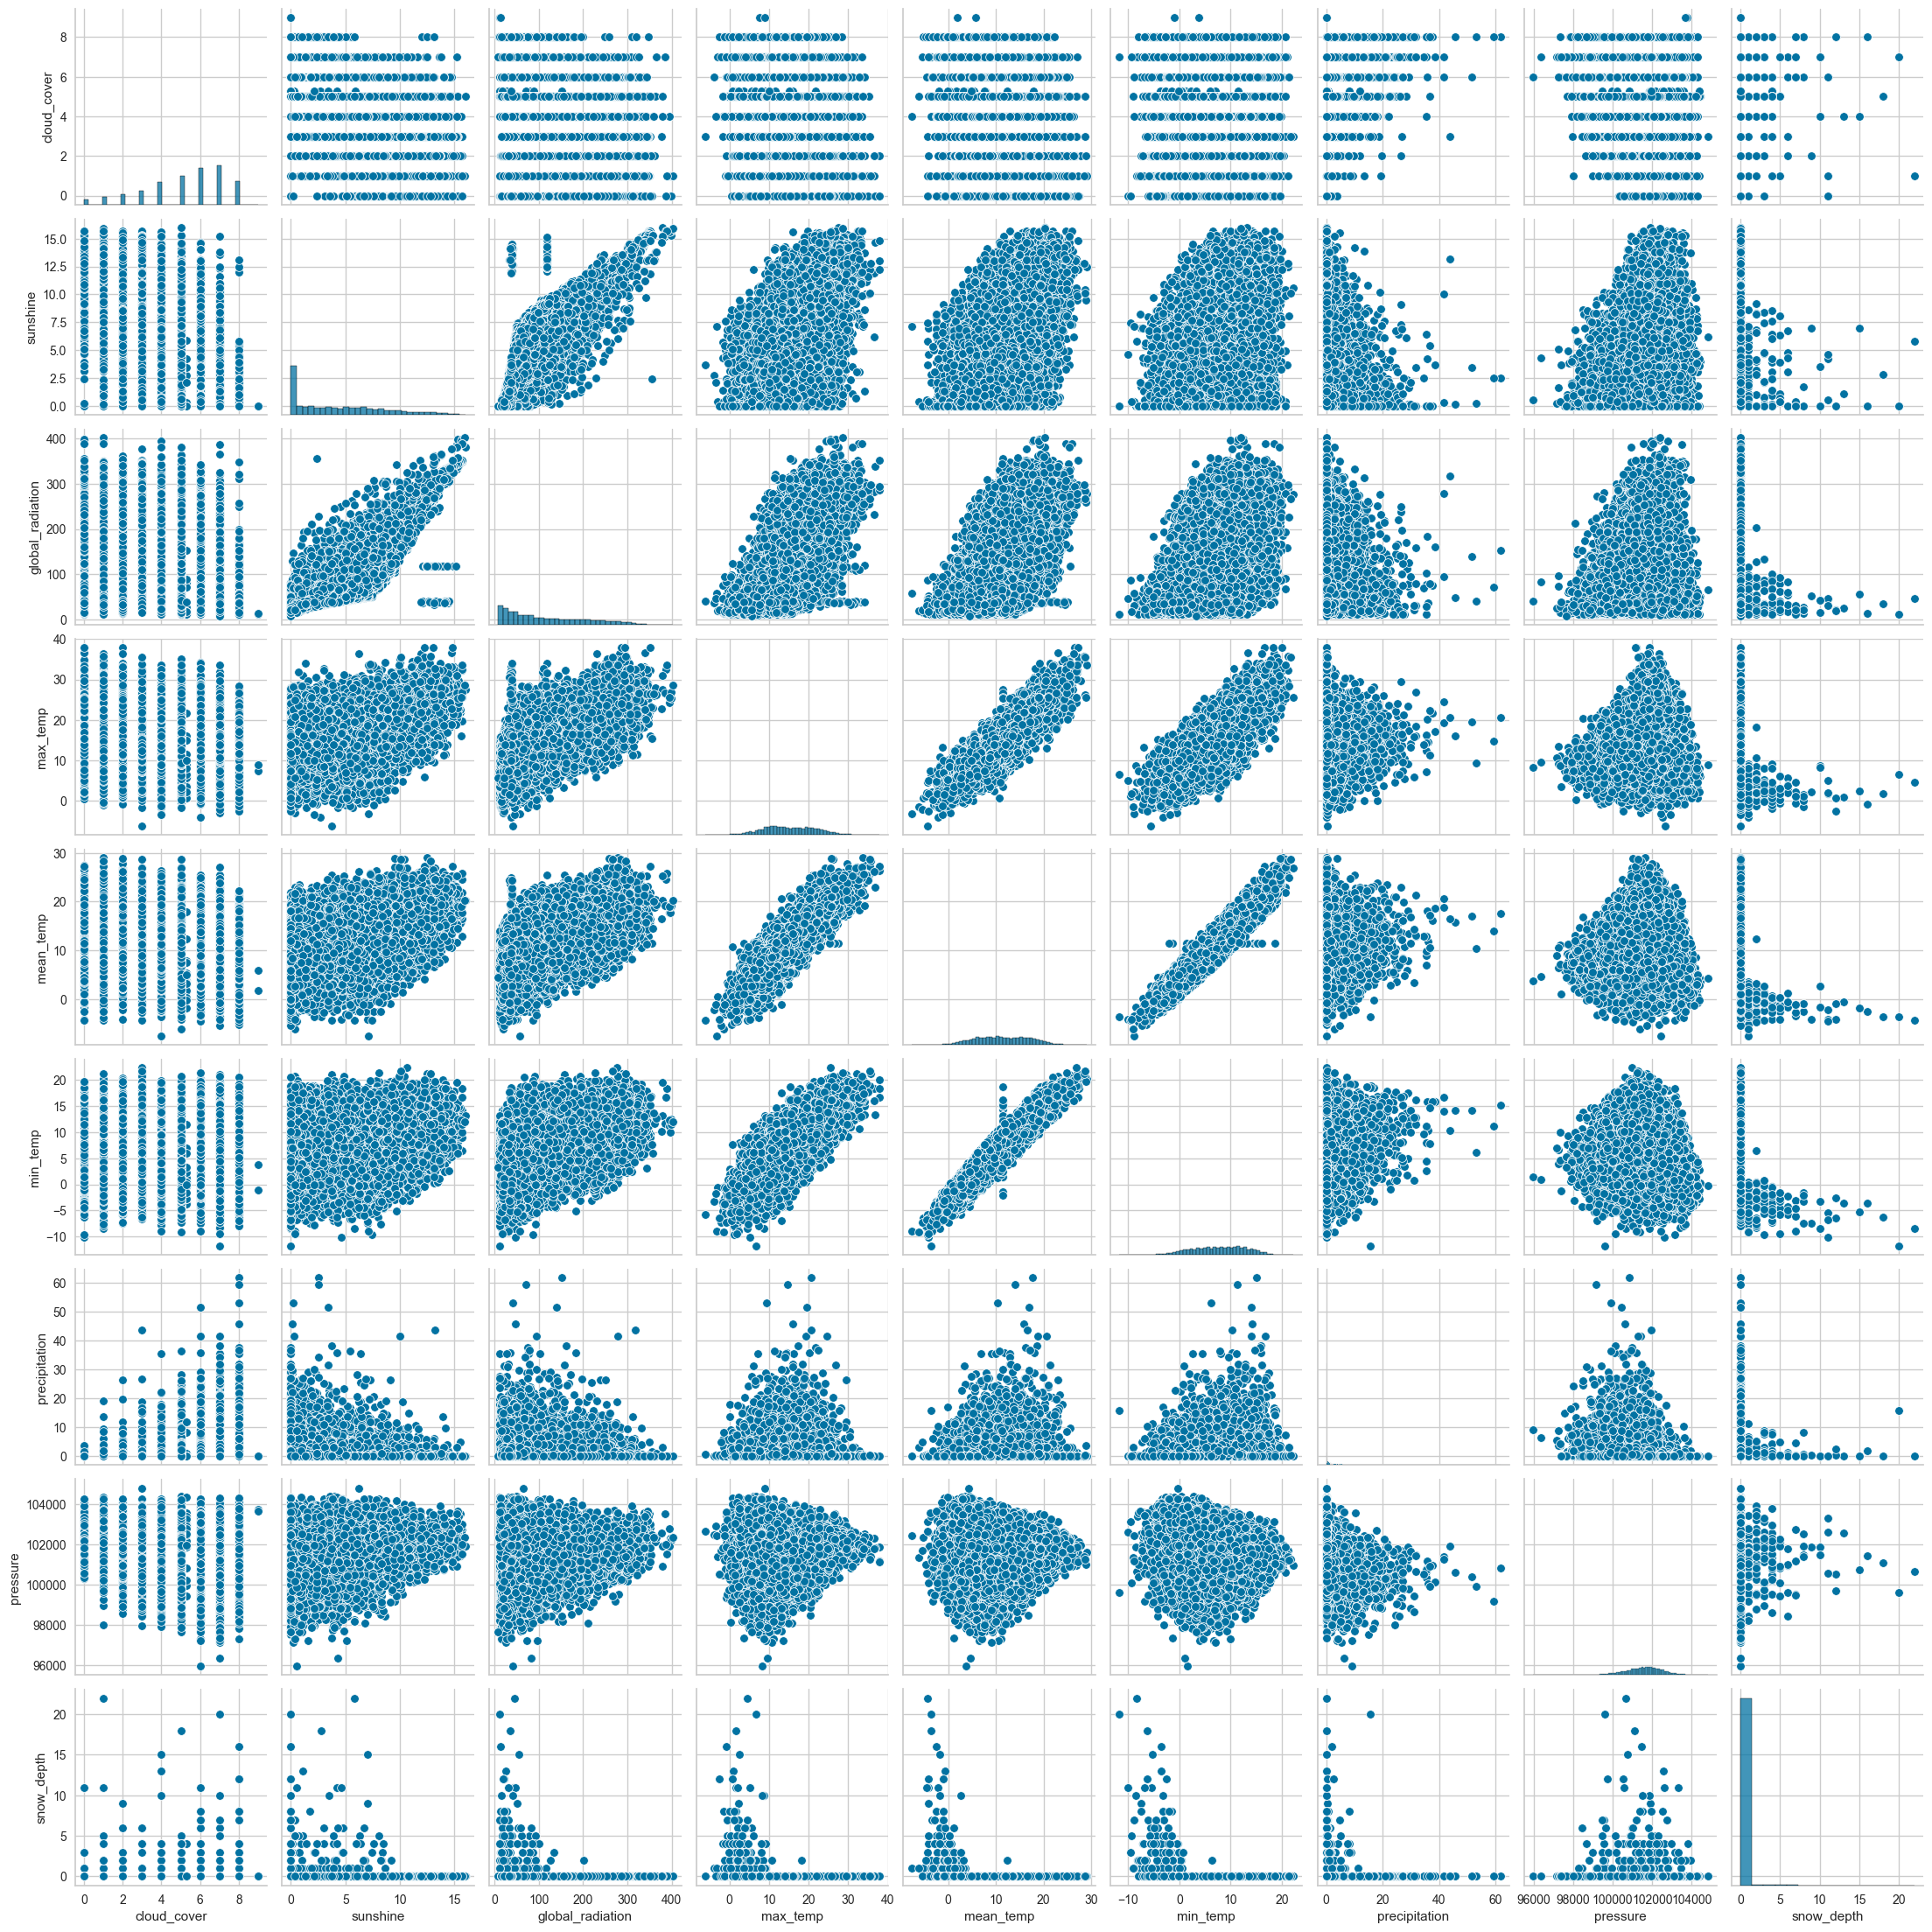

In [11]:
sns.pairplot(data)

<function matplotlib.pyplot.show(close=None, block=None)>

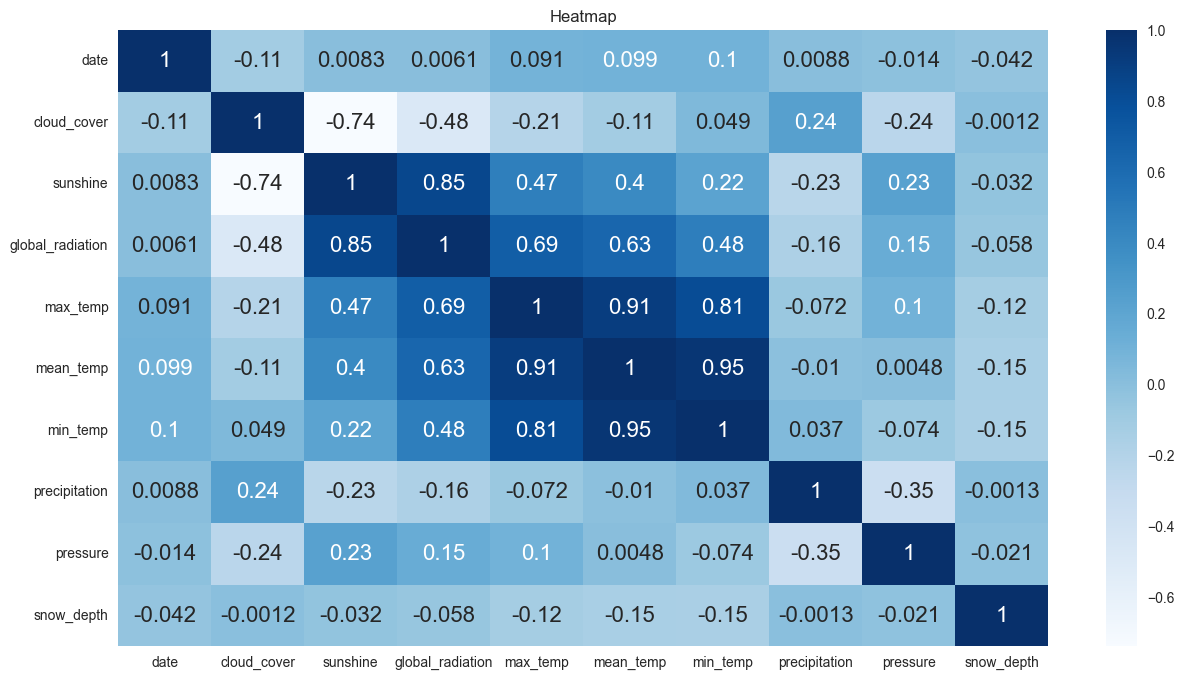

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), cmap='Blues', annot=True, annot_kws={"fontsize":16})
plt.title('Heatmap')
plt.show

2 CLUSTERING 


2.1 CLUSTERING Max_Temp, Min_Temp, Mean_Temp

In [13]:
# Seleziona solo le colonne relative alle temperature
x = data.iloc[:, [4, 5]].values  # max_temp, mean_temp

# Verifica la forma di x
print(x.shape)


(15341, 2)


Text(0, 0.5, 'wcss')

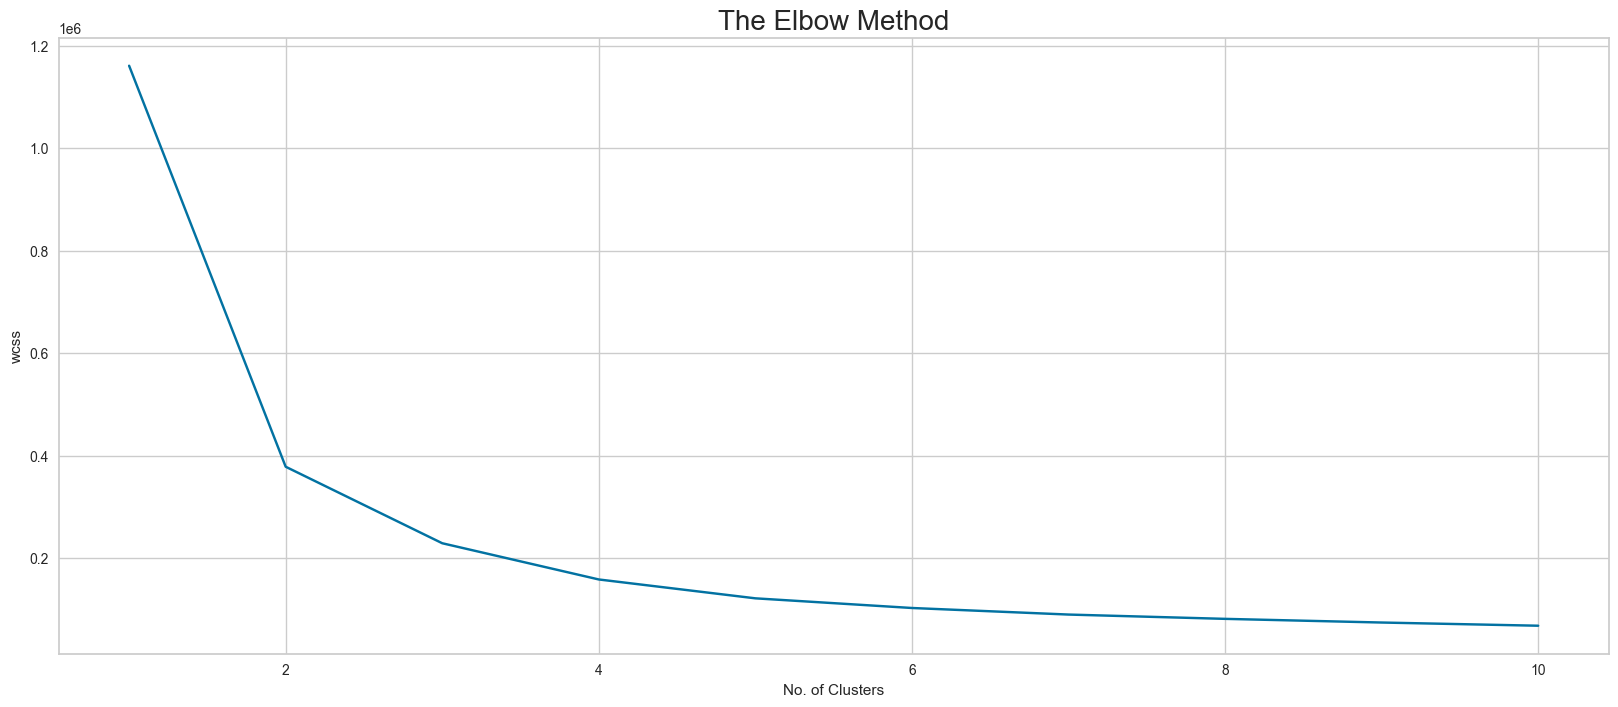

In [14]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.figure(figsize=(20,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

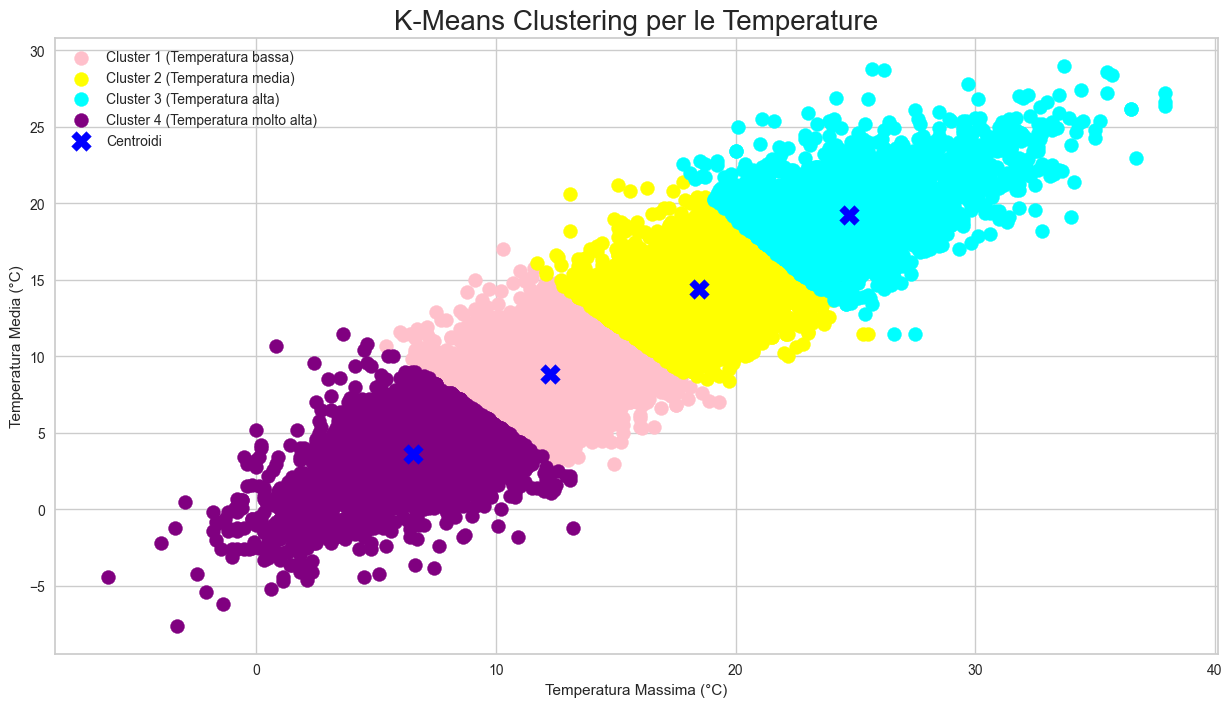

Centroidi dei cluster (Temperatura Massima e Temperatura Media):
[[12.25452846  8.85147798]
 [18.4813155  14.41792779]
 [24.7278856  19.22174022]
 [ 6.54854571  3.59950676]]


In [15]:


# Applica K-means clustering con 4 cluster
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

# Crea il grafico
plt.figure(figsize=(15, 8))

# Visualizza i cluster con colori differenti
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='pink', label='Cluster 1 (Temperatura bassa)')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='yellow', label='Cluster 2 (Temperatura media)')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c='cyan', label='Cluster 3 (Temperatura alta)')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s=100, c='purple', label='Cluster 4 (Temperatura molto alta)')

# Visualizza i centroidi dei cluster
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='blue', label='Centroidi', marker='X')

# Aggiungi titolo e etichette
plt.title('K-Means Clustering per le Temperature', fontsize=20)
plt.xlabel('Temperatura Massima (°C)')
plt.ylabel('Temperatura Media (°C)')
plt.legend()
plt.show()

# Visualizza i centroidi dei cluster
print("Centroidi dei cluster (Temperatura Massima e Temperatura Media):")
print(km.cluster_centers_)



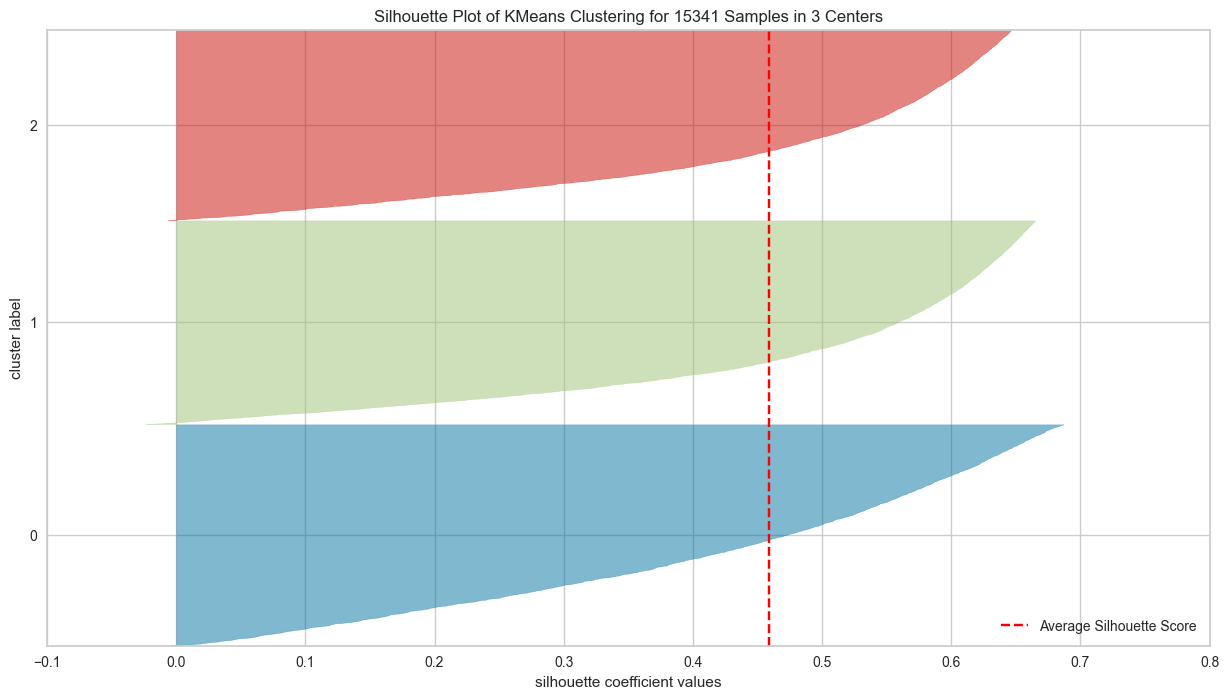

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 15341 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [16]:

# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        

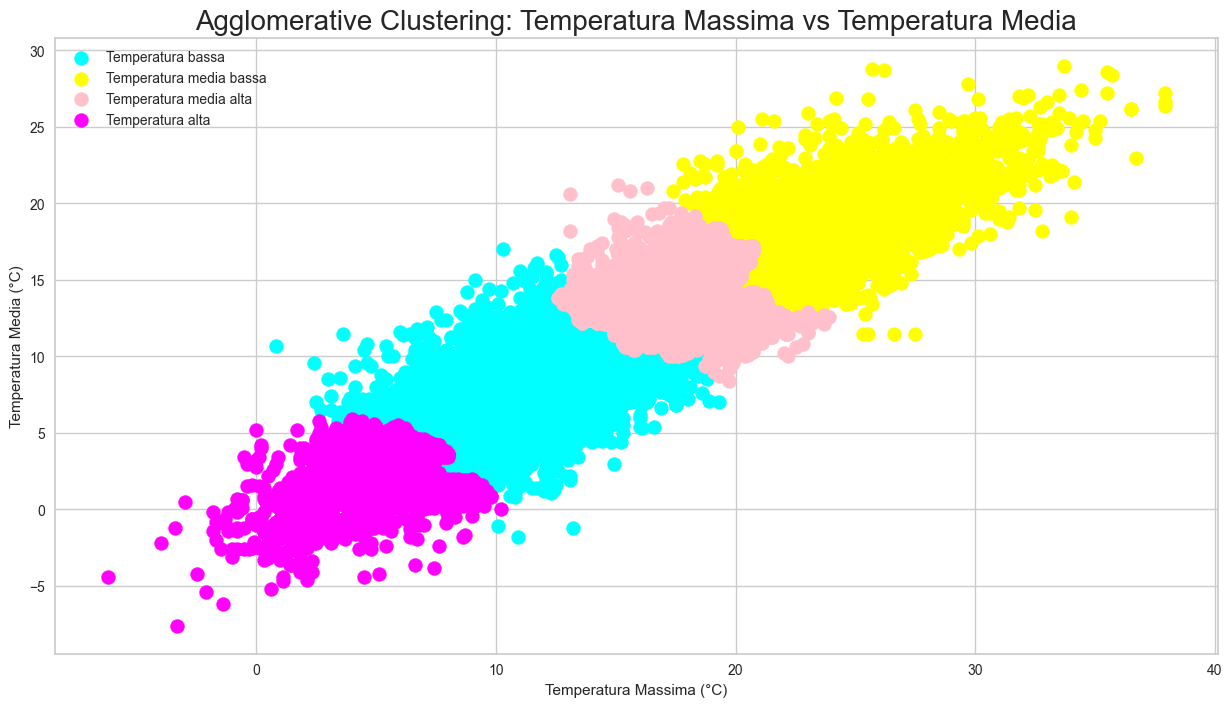

In [17]:


# Applica Agglomerative Clustering con 4 cluster e linkage 'ward'
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_hc = hc.fit_predict(x)

# Mappa dei colori per i cluster
colors = ['cyan', 'yellow', 'pink', 'magenta']
labels = ['Temperatura bassa', 'Temperatura media bassa', 'Temperatura media alta', 'Temperatura alta']

# Crea il grafico per visualizzare i cluster
plt.figure(figsize=(15, 8))

# Visualizza i cluster con colori differenti
for i in range(4):
    plt.scatter(x[y_hc == i, 0], x[y_hc == i, 1], s=100, c=colors[i], label=labels[i])

# Aggiungi titolo e etichette
plt.title('Agglomerative Clustering: Temperatura Massima vs Temperatura Media', fontsize=20)
plt.xlabel('Temperatura Massima (°C)')
plt.ylabel('Temperatura Media (°C)')
plt.legend()
plt.show()



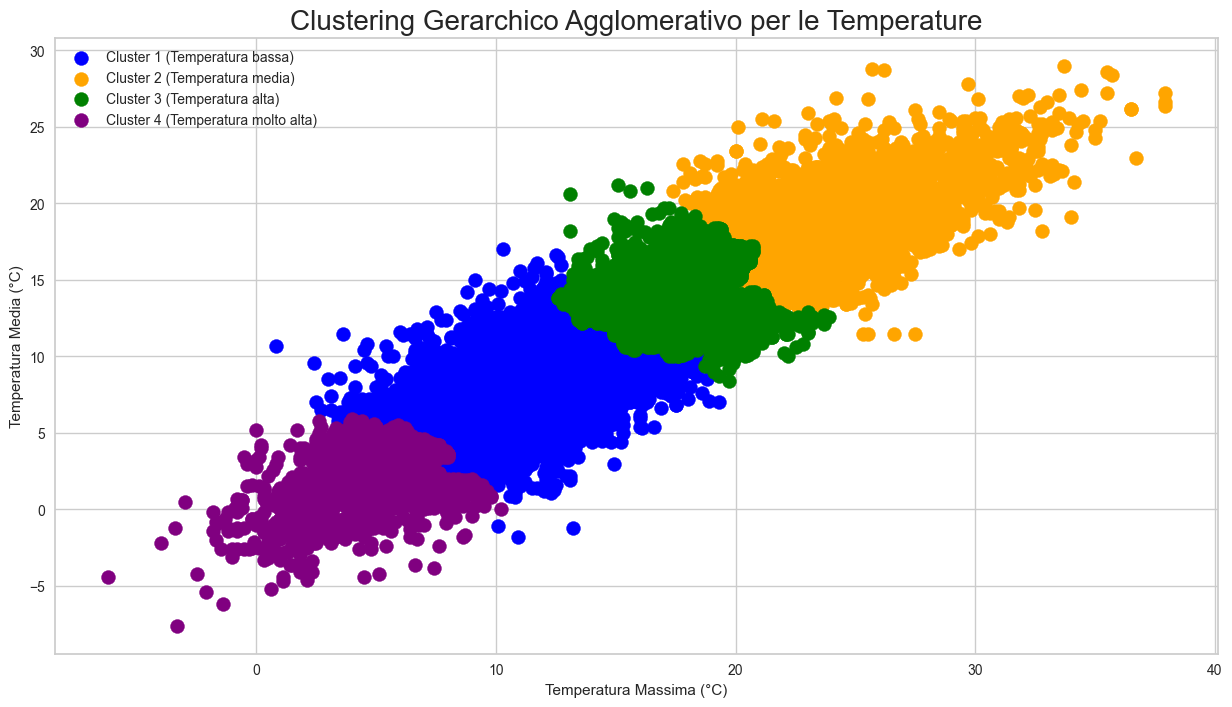

In [18]:

# Applica Agglomerative Clustering con 4 cluster
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_hc = hc.fit_predict(x)

# Mappa dei colori per i cluster e descrizioni
colors = ['blue', 'orange', 'green', 'purple']
labels = ['Cluster 1 (Temperatura bassa)', 'Cluster 2 (Temperatura media)', 'Cluster 3 (Temperatura alta)', 'Cluster 4 (Temperatura molto alta)']

# Crea il grafico per visualizzare i cluster
plt.figure(figsize=(15, 8))

# Visualizza i cluster con colori differenti e descrizioni
for i in range(4):
    plt.scatter(x[y_hc == i, 0], x[y_hc == i, 1], s=100, c=colors[i], label=labels[i])

# Aggiungi titolo e etichette
plt.title('Clustering Gerarchico Agglomerativo per le Temperature', fontsize=20)
plt.xlabel('Temperatura Massima (°C)')
plt.ylabel('Temperatura Media (°C)')
plt.legend()
plt.show()


2.2 CLUSTERING sunshine global_radiationc precipitation

In [19]:
# Seleziona le colonne relative all'irraggiamento e alle precipitazioni
x = data.iloc[:, [ 3, 7]].values  


# Verifica la forma di x
print(x.shape)

(15341, 2)


Text(0, 0.5, 'wcss')

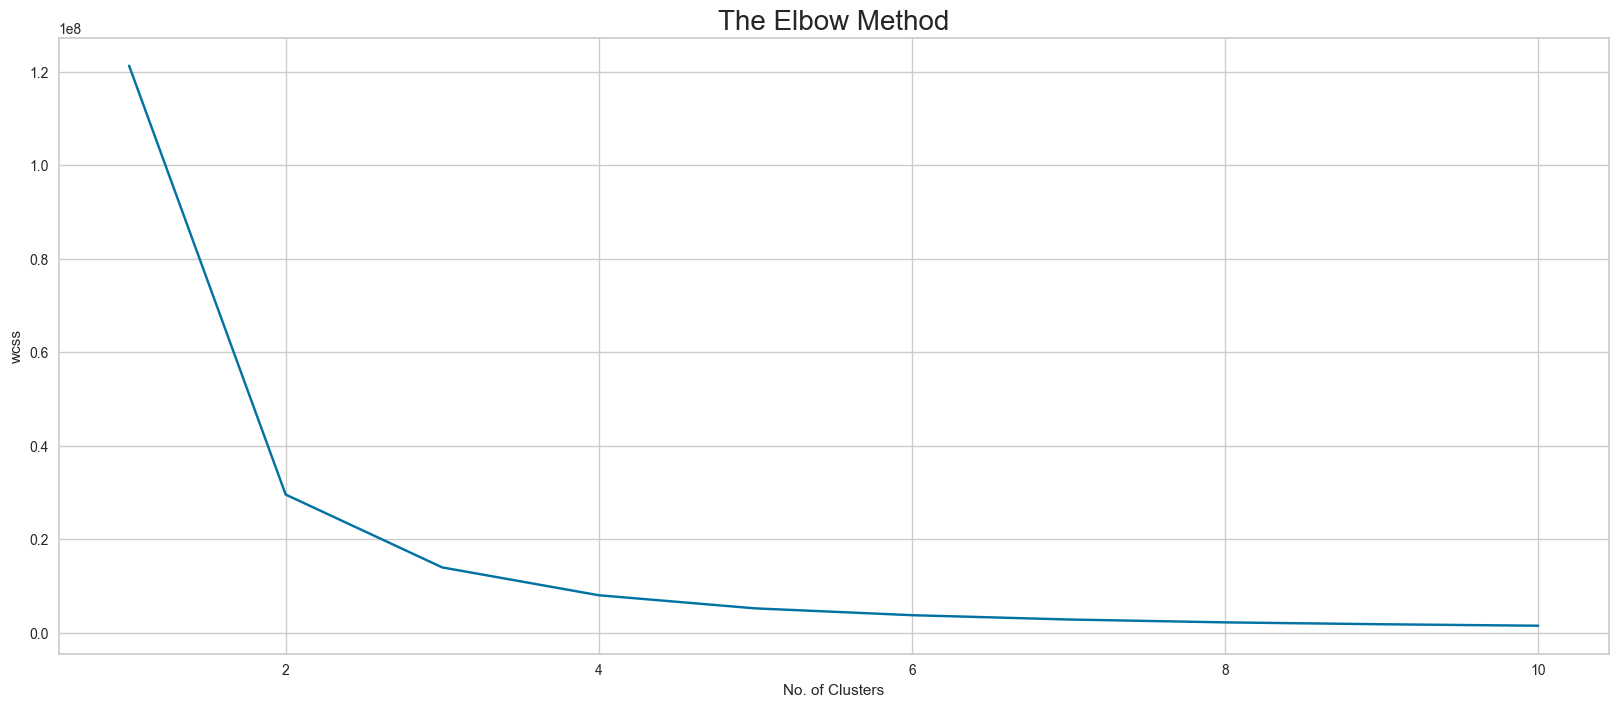

In [20]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.figure(figsize=(20,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

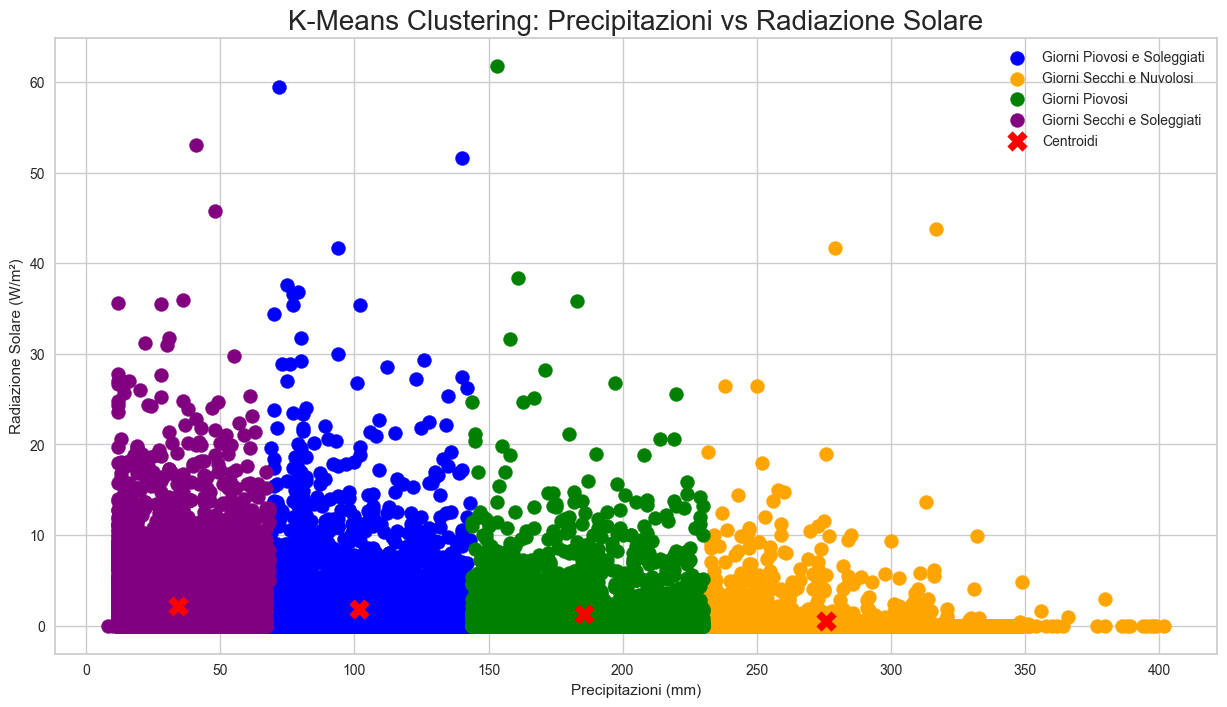

Centroidi dei cluster (Precipitazioni e Radiazione Solare):
[[101.79649647   1.87677634]
 [275.7228164    0.55393818]
 [185.65354819   1.25497366]
 [ 34.17802902   2.17746686]]


In [21]:

# Applica K-means clustering con 4 cluster
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

# Mappa dei colori per i cluster e descrizioni
colors = ['blue', 'orange', 'green', 'purple']
labels = ['Giorni Piovosi e Soleggiati', 'Giorni Secchi e Nuvolosi', 'Giorni Piovosi', 'Giorni Secchi e Soleggiati']

# Crea il grafico per visualizzare i cluster
plt.figure(figsize=(15, 8))

# Visualizza i cluster con colori differenti e descrizioni
for i in range(4):
    plt.scatter(x[y_means == i, 0], x[y_means == i, 1], s=100, c=colors[i], label=labels[i])

# Visualizza i centroidi dei cluster
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='red', label='Centroidi', marker='X')

# Aggiungi titolo e etichette
plt.title('K-Means Clustering: Precipitazioni vs Radiazione Solare', fontsize=20)
plt.xlabel('Precipitazioni (mm)')
plt.ylabel('Radiazione Solare (W/m²)')
plt.legend()
plt.show()

# Visualizza i centroidi dei cluster
print("Centroidi dei cluster (Precipitazioni e Radiazione Solare):")
print(km.cluster_centers_)



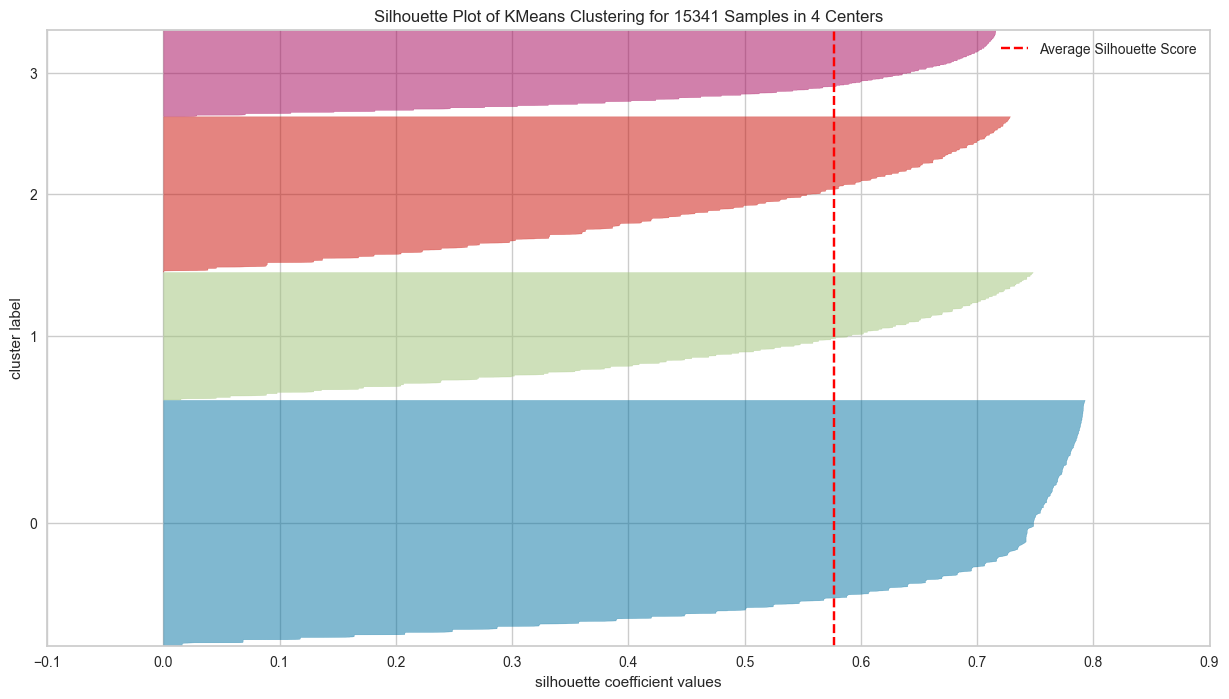

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 15341 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [29]:
# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()

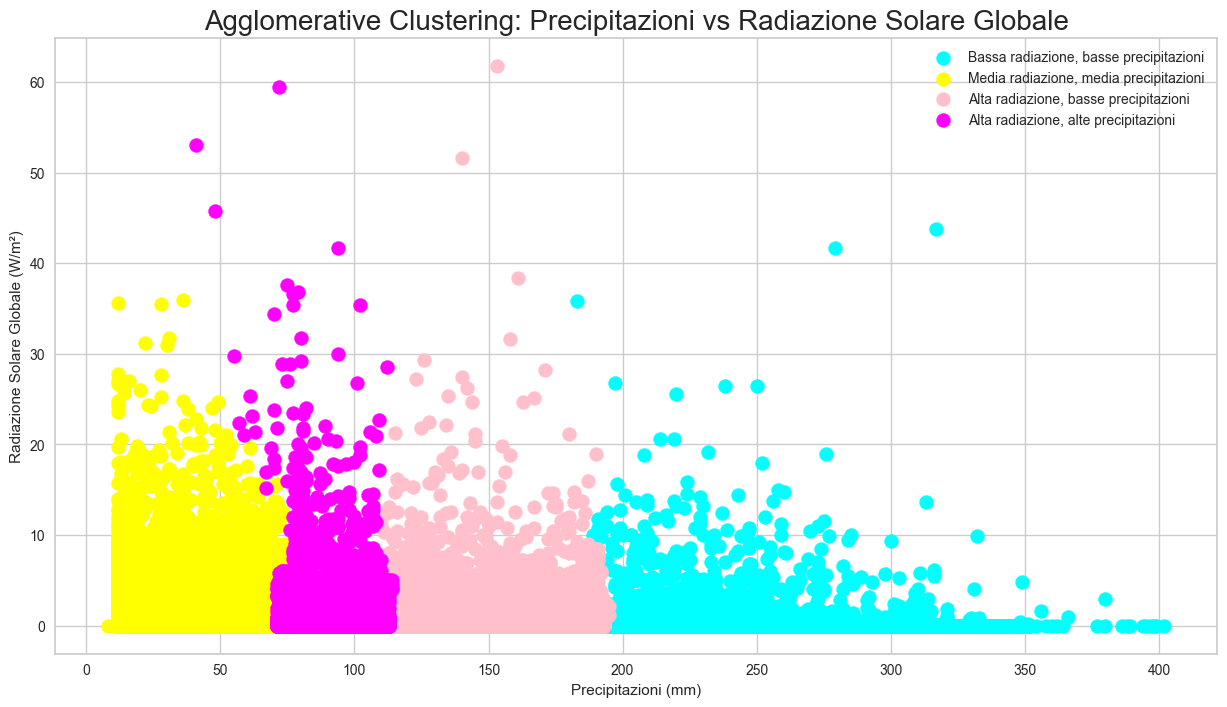

In [23]:


# Applica Agglomerative Clustering con 4 cluster e linkage 'ward'
hc_precip_radiation = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_hc_precip_radiation = hc_precip_radiation.fit_predict(x)

# Crea il grafico per visualizzare i cluster
plt.figure(figsize=(15, 8))

# Visualizza i cluster con colori differenti
plt.scatter(x[y_hc_precip_radiation == 0, 0], x[y_hc_precip_radiation == 0, 1], s=100, c='cyan', label='Bassa radiazione, basse precipitazioni')
plt.scatter(x[y_hc_precip_radiation == 1, 0], x[y_hc_precip_radiation == 1, 1], s=100, c='yellow', label='Media radiazione, media precipitazioni')
plt.scatter(x[y_hc_precip_radiation == 2, 0], x[y_hc_precip_radiation == 2, 1], s=100, c='pink', label='Alta radiazione, basse precipitazioni')
plt.scatter(x[y_hc_precip_radiation == 3, 0], x[y_hc_precip_radiation == 3, 1], s=100, c='magenta', label='Alta radiazione, alte precipitazioni')

# Aggiungi titolo e etichette
plt.title('Agglomerative Clustering: Precipitazioni vs Radiazione Solare Globale', fontsize=20)
plt.xlabel('Precipitazioni (mm)')
plt.ylabel('Radiazione Solare Globale (W/m²)')
plt.legend()
plt.show()



PCA E DBSCAN


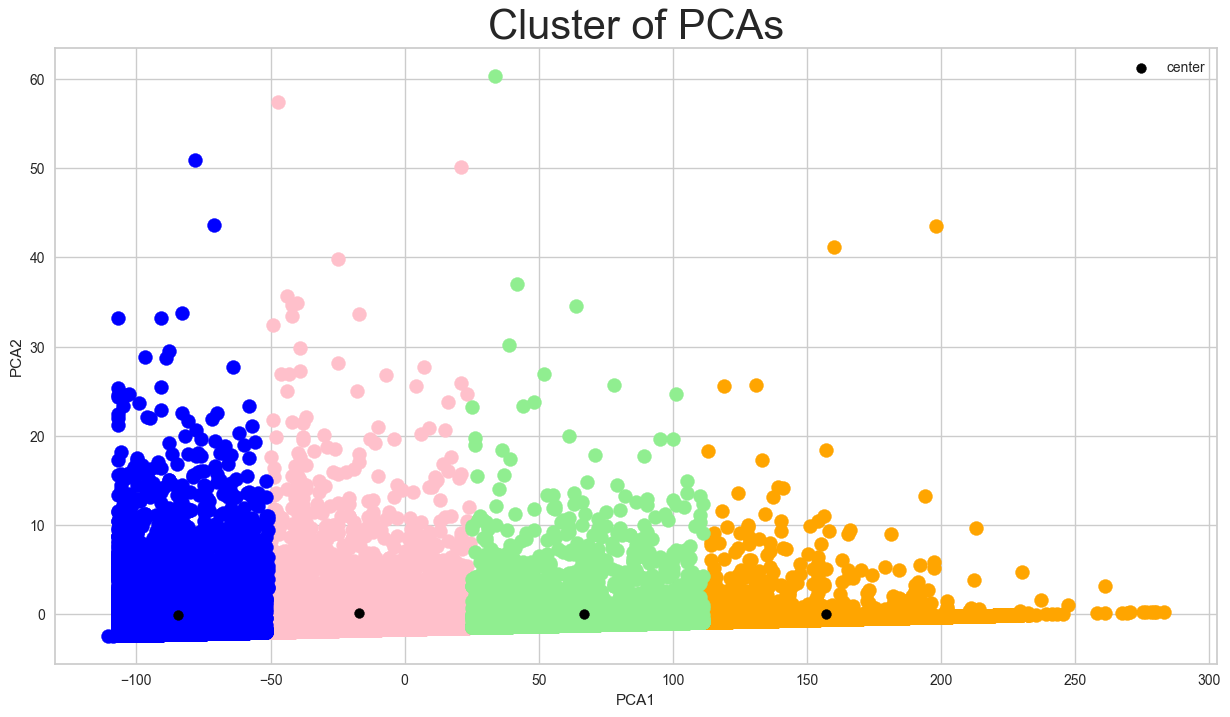

In [25]:


pca = PCA(n_components=2, svd_solver="auto").fit(x)
pca_x = pca.transform(x)
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize=(15,8))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
plt.scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'blue')


centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

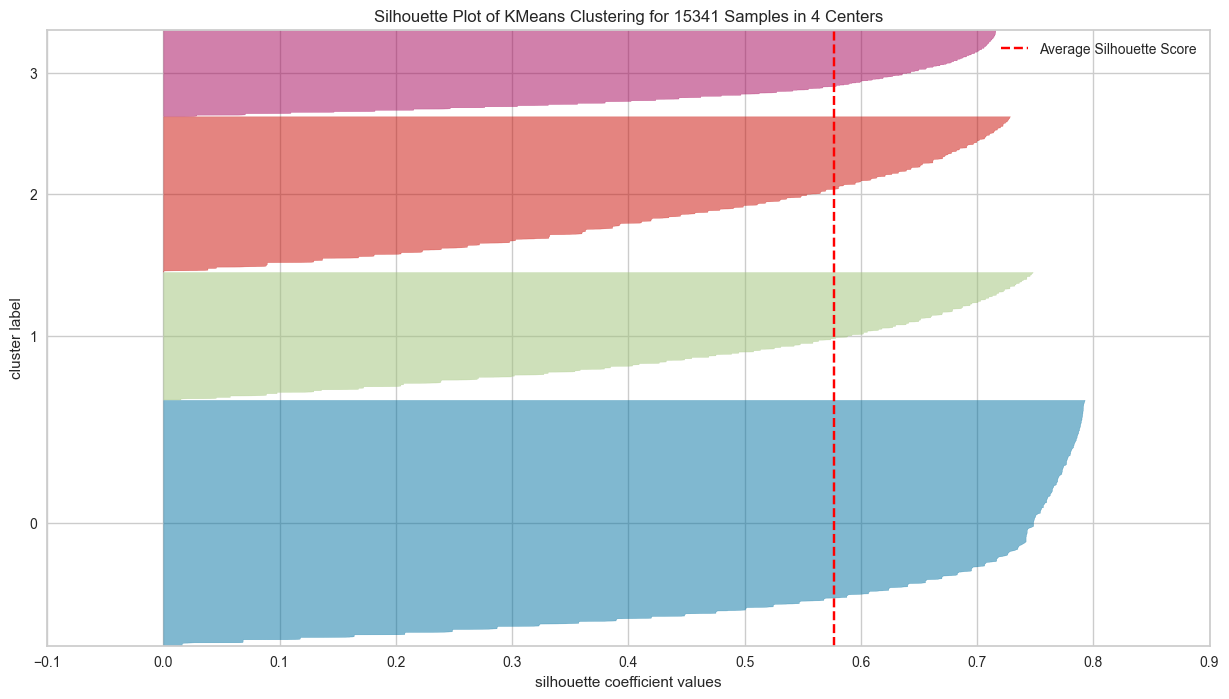

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 15341 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [26]:
# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()  

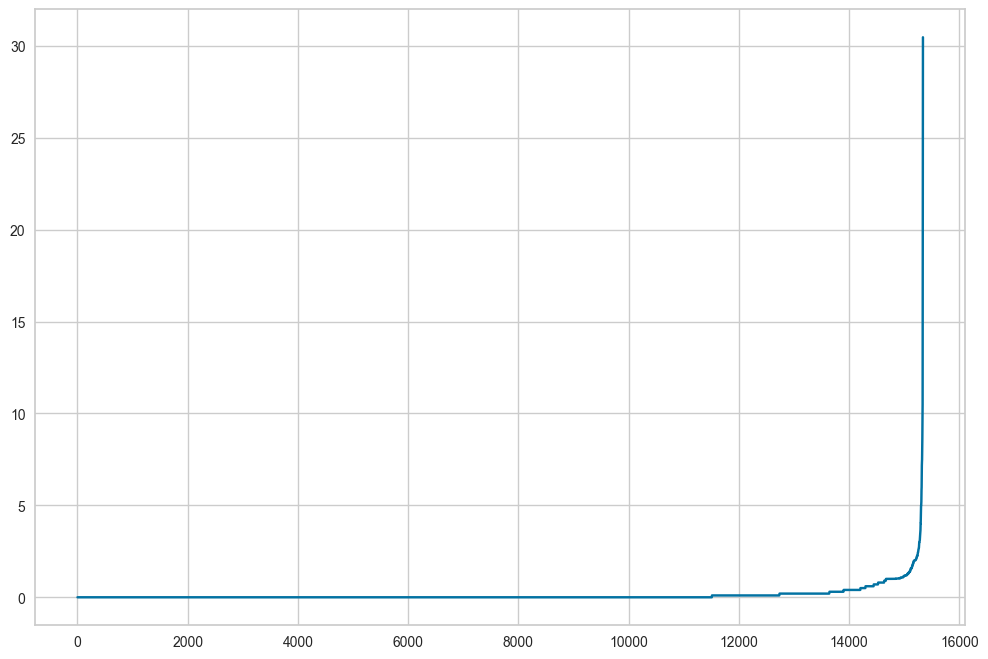

In [27]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

distances = np.sort(distances, axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])

In [36]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=2, min_samples=7).fit(x)
ymeans = db.labels_
ymeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

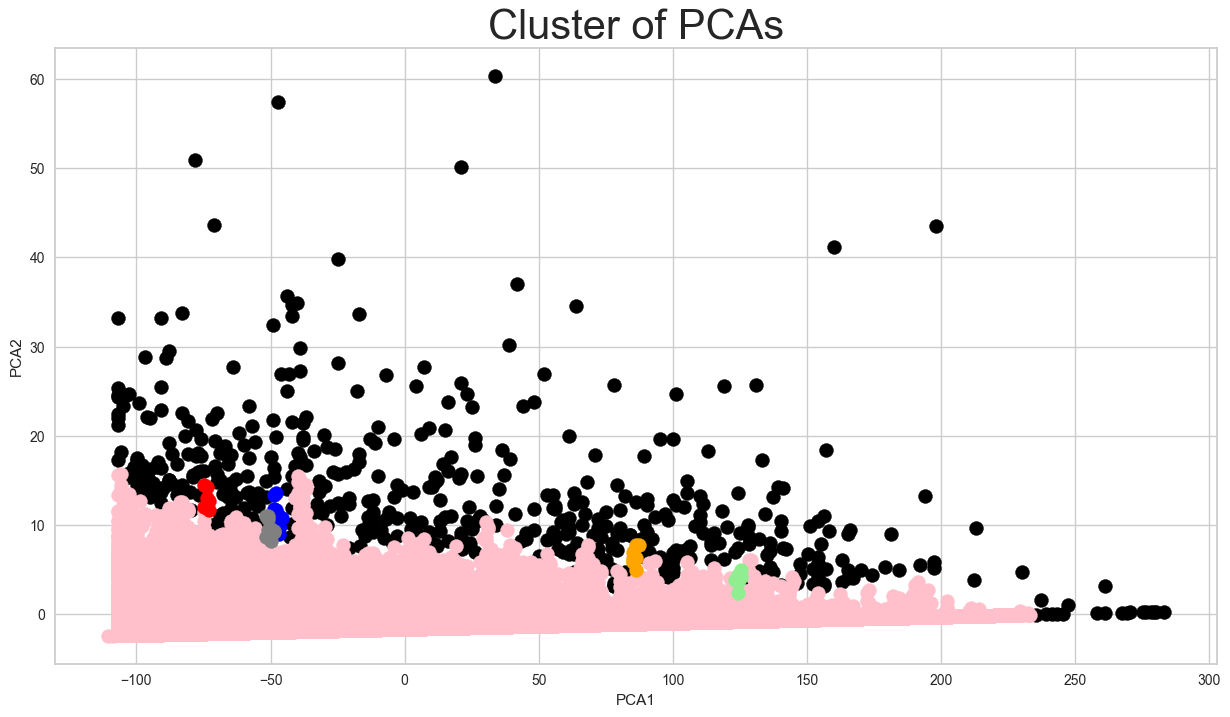

In [37]:
plt.figure(figsize=(15,8))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(pca_x[ymeans == -1, 0], pca_x[ymeans == -1, 1], s = 100, c = 'black')
plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
plt.scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'blue')
plt.scatter(pca_x[ymeans == 4, 0], pca_x[ymeans == 4, 1], s = 100, c = 'gray')
plt.scatter(pca_x[ymeans == 5, 0], pca_x[ymeans == 5, 1], s = 100, c = 'red')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()